### Import relevant libraries

In [1]:
# Import libraries

import pandas as pd
import datetime
import numpy as np
from time import time
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import statsmodels.formula.api as smf

### User-defined functions 

In [2]:
'''
    Function to extract the data from a cell using data attribute 
    
    Returns: Extracted data values from the cell
'''

def extract_data(cell):
    return cell.data

In [3]:
# Data Cleaning and Analysis
final_df = pd.read_csv('S&P100_Data.csv')    # Contains each stock in the S&P100 index
sp_100 = pd.read_csv('^OEX.csv')  # Contains OHLC data for S&P100 index

# Cleaning data and setting index values
final_df.set_index('Date', inplace=True)
sp_100.set_index('Date',inplace=True)

# Drop METV and MLSS owing to large number of missing values
final_df = final_df.drop(columns=['METV','MLSS'])
final_df

# Cleaning SP100 Data and calculating Returns 
sp_100 = pd.DataFrame(sp_100['Adj Close'])
sp_100 = sp_100.rename(columns={'Adj Close':'SP_100'})
sp_100['Returns'] = sp_100.pct_change()*100
sp_100 = sp_100.dropna()
sp_100_df = sp_100.drop('SP_100', axis = 1)
sp_100_df.columns = ['SP_100']

sp_100_ret = np.array(sp_100['Returns']).reshape(-1,1)  # Create a 1D numpy array of response variable

## Construct a full regression model

In [4]:
# Train a multiple linear regression model 
X = sm.add_constant(final_df)  # Add a constant term to the features dataset

# Fitting full regression model using OLS method
model = sm.OLS(sp_100_ret, X).fit()

full_model_summary = model.summary()

# Save coefficients table for full model
df_full_model = pd.DataFrame(full_model_summary.tables[1][1:], columns = full_model_summary.tables[1][0])

# Converting index and columns to string and rename index
df_full_model.columns = df_full_model.columns.astype(str)
col = df_full_model.columns.to_list()
col[0] = 'Name'
df_full_model.columns = col
df_full_model.set_index('Name', inplace = True)
df_full_model.index = [str(cell.data) for cell in df_full_model.index]

# Convert dataframe values to float 
df_full_model = df_full_model.applymap(extract_data)
df_full_model = df_full_model.astype(float)

# Save full model variables in elem1
elem1 = df_full_model.index.to_list()

# Save Coefficients for full model in elem2
elem2 = df_full_model.iloc[:,0].to_list()

string_list = [elem1[i+1] + ' * ' + str(elem2[i+1]) for i, val in enumerate(elem1[:-1])]

string_full_model = str(elem2[0])

ls1 = [elem1[i+1] for i, val in enumerate(elem1[:-1])]
string1 = ls1[0]

for i, val in enumerate(string_list):
    string_full_model = string_full_model + ' + '
    string_full_model = string_full_model + val
    if i>0:
        string1 = string1 + '+' + ls1[i]
    
string_full_model = 'SP_100 ~ ' + string_full_model
string1 = 'SP_100~' + string1

### Full Regression Model
#### SP_100 = -0.0296 + ORCL * 0.012 + MSFT * 0.0639 + HON * 0.0026 + KO * 0.009 + XOM * 0.0155 + GD * -0.0039 + GE * 0.0058 + CHTR * -0.0016 + GM * 0.0039 + IBM * 0.0015 + META * 0.0308 + ABBV * 0.006 + PEP * 0.0175 + MO * 0.0022 + COP * 0.0076 + AMGN * 0.012 + CVX * 0.0175 + GOOG * 0.0047 + AAPL * 0.0852 + TXN * 0.0114 + CVS * 0.0096 + BH * 0.0015 + RTX * -0.0016 + PG * 0.0206 + SO * -0.0095 + CAT * 0.0034 + CL * 0.0056 + BMY * 0.0038 + WBA * -0.0037 + BA * 0.0112 + ABT * 0.0057 + LMT * 0.0094 + EXC * 0.0085 + PFE * 0.0128 + EMR * 0.0049 + JNJ * 0.0263 + MMM * -5.842e-05 + MRK * 0.0128 + NEE * 0.0194 + F * 0.0062 + DIS * 0.0227 + DUK * -0.0052 + WFC * 0.0167 + MCD * 0.0085 + JPM * 0.0292 + UNP * 0.0092 + TGT * 0.0067 + BK * 0.0048 + DHR * 0.0163 + LLY * 0.0143 + WMT * 0.0109 + NKE * 0.0075 + AXP * 0.004 + INTC * 0.0132 + BAC * 0.0091 + MDT * -0.0009 + FDX * 0.0026 + AMD * 0.0028 + LOW * 0.009 + TMO * 0.0155 + VZ * 0.0163 + T * 0.0141 + USB * -0.0143 + HD * 0.0076 + AIG * -0.0004 + MS * 0.0068 + C * -0.0023 + SCHW * 0.001 + ADBE * 0.0182 + CSCO * 0.004 + QCOM * 0.0168 + GILD * 0.0065 + SBUX * 0.0036 + SPG * -0.0037 + COF * 0.004 + AMZN * 0.0377 + AMT * 0.0092 + NVDA * 0.0091 + BKNG * 0.0038 + GS * 0.0077 + COST * 0.0237 + BLK * 0.0229 + UPS * 0.0143 + MET * 0.0132 + MDLZ * -0.0044 + ACN * 0.0146 + NFLX * 0.0046 + CMCSA * 0.0183 + CRM * 0.0077 + GOOGL * 0.0405 + MA * 0.0064 + TMUS * -0.0011 + PM * 0.0034 + V * 0.0073 + UNH * 0.0151 + AVGO * -0.0049 + TSLA * 0.0103 + ε

#### where ε is the error term

## Use partial F-statistics and backward elimination to select variables from the full regression model in 1. Write down the selected model.

### Model Selected using Backward Elimination

In [5]:
# Determine most significant variables using critical p value = 0.5%
df_significant = df_full_model[df_full_model['P>|t|'] < 0.005]

# Contains variables selected using backward elimination
columns = df_significant.index.tolist()[1:]  

# Add constant to the explanatory variables matrix
X_selected = sm.add_constant(final_df[columns])

# Fitting OLS regression model for selected variables
selected_model = sm.OLS(sp_100_ret, X_selected).fit()

# Summary of OLS regression model using selected variables
selected_model_summary = selected_model.summary()

# Save coefficients table for selected model
df_selected_model = pd.DataFrame(selected_model_summary.tables[1], columns=selected_model_summary.tables[1][0])
df_selected_model = df_selected_model.iloc[1:,:]

ls = df_selected_model.columns.to_list()
ls[0] = 'Name'
df_selected_model.columns = ls
df_selected_model.set_index('Name', inplace = True)

df_selected_model = df_selected_model.applymap(extract_data)
df_selected_model = df_selected_model.astype(float)

# Save selected variables in elem1
elem1 = df_selected_model.index.to_list()

# Save Coefficients for selected model in elem2
elem2 = df_selected_model.iloc[:,0].to_list()

string_list = [elem1[i+1].data + ' * ' + str(elem2[i+1]) for i, val in enumerate(elem1[:-1])]

ls2 = [elem1[i+1].data for i, val in enumerate(elem1[:-1])]
string2 = ls1[0]

string_selected_model = str(elem2[0])
for i, val in enumerate(string_list):
    string_selected_model = string_selected_model + ' + '
    string_selected_model = string_selected_model + val
    if i>0:
        string2 = string2 + ' + ' + ls2[i]
    
string_selected_model = 'SP_100 ~ ' + string_selected_model
string2 = 'SP_100 ~ ' + string2

### Selected Regression Model through Backward Elimination

#### SP_100 = -0.0295 + ORCL * 0.0132 + MSFT * 0.0809 + XOM * 0.0177 + GE * 0.0068 + META * 0.0391 + PEP * 0.023 + COP * 0.0092 + AMGN * 0.0148 + CVX * 0.0194 + AAPL * 0.0867 + TXN * 0.0125 + CVS * 0.007 + PG * 0.0252 + BA * 0.0142 + LMT * 0.0068 + PFE * 0.0138 + JNJ * 0.0288 + MRK * 0.0156 + NEE * 0.0142 + F * 0.0093 + DIS * 0.028 + WFC * 0.0231 + JPM * 0.0449 + UNP * 0.0129 + TGT * 0.0055 + DHR * 0.0169 + LLY * 0.0138 + WMT * 0.0092 + NKE * 0.0107 + INTC * 0.0131 + AMD * 0.0028 + LOW * 0.0135 + TMO * 0.02 + VZ * 0.0137 + T * 0.0166 + USB * -0.0109 + ADBE * 0.0212 + QCOM * 0.0176 + GILD * 0.0084 + AMZN * 0.0452 + AMT * 0.0071 + NVDA * 0.0109 + COST * 0.0247 + BLK * 0.0283 + UPS * 0.0149 + MET * 0.0202 + ACN * 0.0228 + NFLX * 0.0043 + CMCSA * 0.0184 + CRM * 0.0084 + UNH * 0.0217 + TSLA * 0.0102 + ε

#### where ε is the error term

## Compare the full and selected models. Summarize your comparison in an ANOVA table.

## Comparison of Selected and Full Models
1. F-Statistic for full regression model ~ 1846 with dof1 = 97 & dof2 = 1916, P(F-statistic) = 0 and F statistic for selected regression model ~ 2819 with dof1 = 52 & dof2 = 1961, P(F-statistic) = 0 which shows both models are statistically significant. 
2. There isn't any major difference in the adjusted R-squared values for both models, indicating that both models fit the data equally well
3. The AIC and BIC of full regression model is lower than the selected model, indicating a better model fit for the full regression model.

In [6]:
combined_full_model = pd.concat([sp_100_df,final_df],axis=1)
combined_selected_model = pd.concat([sp_100_df,final_df[columns]],axis=1)

In [7]:
# FULL MODEL ANOVA
lr1 = ols(formula=string1,data = combined_full_model).fit()
anova = sm.stats.anova_lm(lr1)
print('\nANOVA results')
print(anova)


ANOVA results
              df       sum_sq      mean_sq             F        PR(>F)
ORCL         1.0  1301.869373  1301.869373  81324.061460  0.000000e+00
MSFT         1.0   902.044776   902.044776  56348.160807  0.000000e+00
HON          1.0   235.743128   235.743128  14726.199926  0.000000e+00
KO           1.0    38.846780    38.846780   2426.647383  0.000000e+00
XOM          1.0    49.261116    49.261116   3077.201191  0.000000e+00
...          ...          ...          ...           ...           ...
V            1.0     0.045679     0.045679      2.853450  9.134076e-02
UNH          1.0     0.513566     0.513566     32.080972  1.702722e-08
AVGO         1.0     0.046705     0.046705      2.917500  8.778552e-02
TSLA         1.0     1.749192     1.749192    109.267009  6.541237e-25
Residual  1916.0    30.672124     0.016008           NaN           NaN

[98 rows x 5 columns]


In [8]:
# SELECTED MODEL ANOVA
lr2 = ols(formula=string2,data = combined_selected_model).fit()
anova_selected = sm.stats.anova_lm(lr2)
print('\nANOVA results')
print(anova_selected)


ANOVA results
              df       sum_sq      mean_sq             F         PR(>F)
ORCL         1.0  1301.869373  1301.869373  66737.920470   0.000000e+00
MSFT         1.0   902.044776   902.044776  46241.653541   0.000000e+00
XOM          1.0   189.931163   189.931163   9736.469047   0.000000e+00
GE           1.0    51.080247    51.080247   2618.534186   0.000000e+00
META         1.0    69.548192    69.548192   3565.259151   0.000000e+00
PEP          1.0    70.387834    70.387834   3608.301827   0.000000e+00
COP          1.0     4.512795     4.512795    231.340052   1.803789e-49
AMGN         1.0    27.974468    27.974468   1434.059237  5.259346e-236
CVX          1.0     4.767839     4.767839    244.414444   5.172440e-52
AAPL         1.0    67.632757    67.632757   3467.067923   0.000000e+00
TXN          1.0    17.838039    17.838039    914.434025  3.307790e-165
CVS          1.0     8.656309     8.656309    443.749627   5.713688e-89
PG           1.0     3.955779     3.955779    202

### Comparison of full regression model and selected regression model using F statistic

In [9]:
RSS_selected = anova_selected.iloc[-1,1]
RSS_full = anova.iloc[-1,1]

p = anova_selected.shape[0] - 1   # Number of selected variables
k = anova.shape[0] - 1            # Number of actual variables
T = final_df.shape[0]             # Number of data points

F = (RSS_selected - RSS_full)*(T-k-1)/((k-p)*RSS_full)
F

10.52429452726153

### F statistic  = 10.525 is significantly larger than critical F value for dof1 = 45 and dof2 = 1916 (p < 0.0001). This means that the complex model (with 97 stocks) fits the S&P 100 returns better than the simplified model (with 52 stocks). 

## For the selected regression model in (b), perform residual diagnostics.

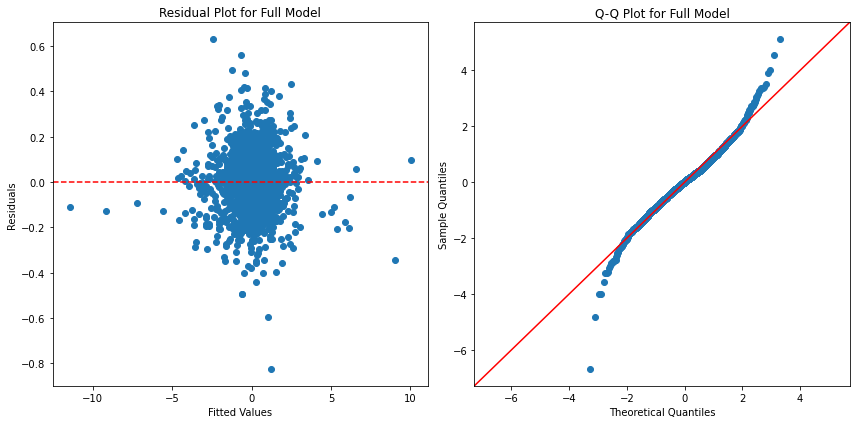

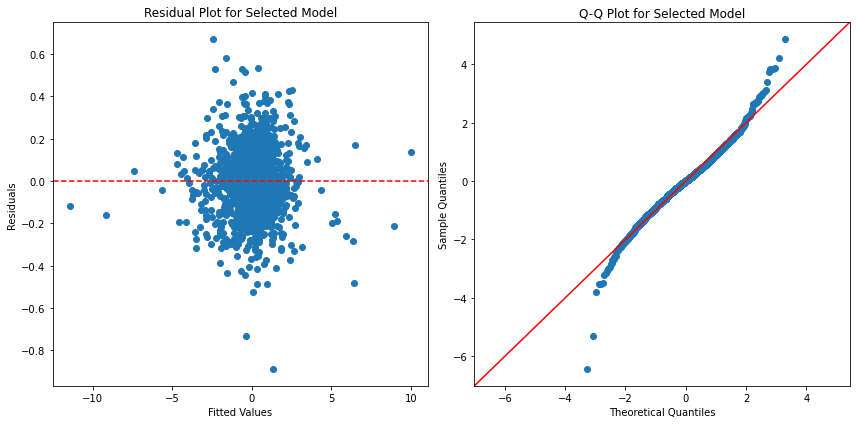

In [10]:
# Residual Plots And QQ Plots for full model

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Residual Plot
ax1.scatter(model.fittedvalues, model.resid)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Plot for Full Model')
ax1.axhline(y=0, color='r', linestyle='--')

# QQ Plot
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot for Full Model")

# Show the plots
plt.tight_layout()
plt.show()

# Residual plots and QQ plots for selected model

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Residual Plot
ax1.scatter(selected_model.fittedvalues, selected_model.resid)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Plot for Selected Model')
ax1.axhline(y=0, color='r', linestyle='--')

# QQ Plot
sm.graphics.qqplot(selected_model.resid, dist=stats.norm, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot for Selected Model")

# Show the plots
plt.tight_layout()
plt.show()

### From the residual plots for both the models we can observe that the residuals are randomly scattered around the point zero with presense of a few outliers. The QQ plots also verify the same results with most residuals lying on the Y=X axis with a few outliers indicating heavier tails at the extremes.

### We have used the step-wise forward selection procedure for identifying at most 5 stocks for the OLS regression analysis. The step-wise forward selection starts with an empty model and then identifies the first stock for which the regression analysis gives lowest AIC. Then the model keeps on adding one stock at a time such that the new combination of stocks used as explanatory variables in the OLS regression model gives the least AIC as well. 

### The selected five stock model is as shown
### SP_100 = -0.0003 + MSFT * 0.0019 + JPM * 0.0021 + AAPL * 0.0016 + PEP * 0.0017 + GOOGL * 0.0013 + ε

### where ε is the residual term

In [11]:
all_stocks = final_df.columns.to_list()

stock_list = []

current_aic, least_aic = float('inf'), float('inf')  # Initialize with a high value

while current_aic == least_aic and len(stock_list) < 5:  
    ls = []

    for candidate in all_stocks:
        string = "{} ~ {} + 1".format(sp_100_df.columns[0], ' + '.join(stock_list + [candidate]))
        score = smf.ols(string, combined_full_model).fit().aic
        ls.append((score, candidate))

    ls.sort()
    least_aic, best_aic = ls[0]

    if current_aic > least_aic:
        all_stocks.remove(best_aic)
        stock_list.append(best_aic)
        current_aic = least_aic

string = "{} ~ {} + 1".format(sp_100_df.columns[0], ' + '.join(stock_list))
five_stock_model = smf.ols(string, combined_full_model).fit()

print(five_stock_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 SP_100   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     4951.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:22:31   Log-Likelihood:                -616.05
No. Observations:                2014   AIC:                             1244.
Df Residuals:                    2008   BIC:                             1278.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0289      0.007     -3.933      0.0